# 19: REGRESION LINEAL - STATSMODEL

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Librería exclusiva para hacer regresión lineal

import statsmodels.formula.api as smf # he tenido que instalar la libreria de statsmodels

In [4]:
raiz = r"C:\Users\Usuario\Documents\05_Formación_Académica\Marc\Data_Science\machine_learning\Recursos_curso\datasets"
fichero = r"ads\Advertising.csv"
ruta = os.path.join(raiz, fichero) 
dataframe = pd.read_csv(ruta)

In [5]:
dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Regresión lineal SIMPLE

La regresión lineal SIMPLE se da cuando SOLO tenemos en cuenta un UNICO parametro para construir el modelo. En otras palabras, es un modelo que asume que la respuesta solo depende de una variable.

In [6]:
# Generación del modelo de regresión simple

regresion_simple = smf.ols(formula = 'Sales ~ TV', # en formula se especifica primero la respuesta 'Sales' y luego la variable 'TV'
                           data = dataframe).fit() # en data se especifica los datos que usamos y acabamos con un '.fit()'

In [7]:
# Visualizar los parametros de la regresion

regresion_simple.params

Intercept    7.032594
TV           0.047537
dtype: float64

En este caso, el parametro 'Intercept' hace referencia al parametro 'a' mientras que 'TV' equivale al parametro 'b'. De este modo, el modelo de regresión lineal simple de 'Sales' en función de 'TV', sería:

- 'Sales' = 7.032594 + 0.047537 * 'TV'

In [8]:
# Visualizar el valor R2

R2_simple = regresion_simple.rsquared
R2_simple

0.611875050850071

In [9]:
# Visualizar el valor R2 ajustado (este valor es mejor que el R2 normal)

R2_ajustado_simple = regresion_simple.rsquared_adj
R2_ajustado_simple

0.6099148238341623

In [10]:
# Visualizar un resumen de la regresión lineal obtenida

regresion_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.47e-42
Time:                        22:21:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los parametros AIC y BIC, cuanto más altos sean MEJOR!

In [11]:
# Utilizar el modelo de regresión para predecir la respuesta

dataframe['Sales - TV Predicción'] = regresion_simple.predict(dataframe['TV']) # especificamos que es la variable 'TV' la de entrada

In [12]:
dataframe.head()

,TV,Radio,Newspaper,Sales,Sales - TV Predicción
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


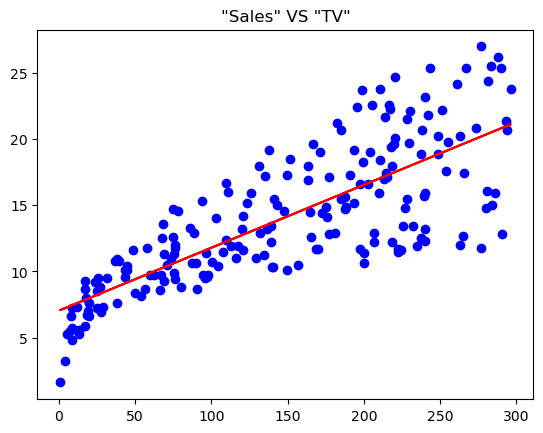

In [13]:
# Visualizar en un plot los resultados

plt.plot(dataframe['TV'], dataframe['Sales'], 'bo') # en puntos verdes las 'sales'
plt.plot(dataframe['TV'], dataframe['Sales - TV Predicción'], 'r') 
plt.title('"Sales" VS "TV"')

%matplotlib inline

El error que cometemos al predecir la respuesta y que el modelo no puede explicar se calcula con la siguiente fórmula:

- error = RSE / respuesta_Y_promedio

In [14]:
# Calcular el error

ssd = sum((dataframe['Sales'] - dataframe['Sales - TV Predicción']) ** 2)
y_promedio = np.mean(dataframe['Sales'])
rse = np.sqrt(ssd / (len(dataframe) - 2))

error = rse / y_promedio

In [15]:
print(f'EL error que el modelo no puede explicar es del {round(error * 100, 2)}%')

EL error que el modelo no puede explicar es del 23.24%


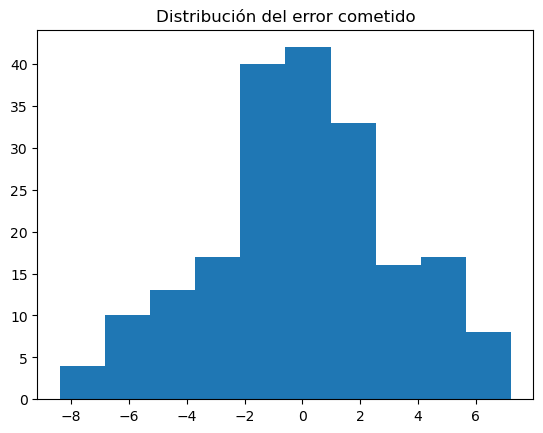

In [16]:
# Comprobar que el error que se comete (ssd) sigue una distribición NORMAL mediante un plot

plt.hist(dataframe['Sales'] - dataframe['Sales - TV Predicción'])
plt.title('Distribución del error cometido')

%matplotlib inline

### Regresión lineal MULTIPLE

La regresión lineal múltiple se utiliza cuando tenemos más de una variable que puede ser relevante para construir el modelo. De este modo, la regresión lineal múltiple consiste en realizar diferentes simulaciones incluyendo combinaciones entre los diferentes paramentros candidatos para decidir que parametros usar y cuales no. De este modo, el modelo tendrá un valor a, y tantos valores b_i como parametros relevantes para el modelo:

Respuesta = a + b_1 * parametro_1 + b_2 * parametro_2 + b_3 * paramentro_3 .....

Para este caso, teniendo 3 variables tenemos los siguientes posibles modelos:

- Sales ~ TV
- Sales ~ Newspaper
- Sales ~ Radio
- Sales ~ TV + Newspaper
- Sales ~ TV + Radio
- Sales ~ Newspaper + Radio
- Sales ~ TV + Newspaper + Radio

Nota: Hay que tener en cuenta que NO siempre por tener más parametros el sistema es mejor, ya que se puede dar el fenomeno de MULTICOLINEALIDAD. De hecho, cuantos menos parametros tenga un modelo mejor siempre y cuando la predicción sea solida+Radio

In [17]:
# Regresión lineal con los parametros 'TV' + 'Newspaper'

regresion_multiple = smf.ols(formula = 'Sales ~ TV + Newspaper', data = dataframe).fit()
regresion_multiple.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

De este modo, el modelo quedaría tal que así:

Respuesta = 5.774948 + (0.046901 * 'TV') + (0.044219 * 'Newspaper')

In [18]:
# Visualizar los pvalues de cada uno de los parametros

regresion_multiple.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [19]:
# Visualizar el R2 ajustado

R2_ajustado_multiple = regresion_multiple.rsquared_adj
R2_ajustado_multiple

0.6422399150864777

In [20]:
print(f'El R2 ajustado de TV + Newspaper es {R2_ajustado_multiple}, el cual es mayor al de TV que es {R2_ajustado_simple}. De este modo, es mejor el modelo con estos dos parametros')

El R2 ajustado de TV + Newspaper es 0.6422399150864777, el cual es mayor al de TV que es 0.6099148238341623. De este modo, es mejor el modelo con estos dos parametros


In [21]:
# Utilizar el modelo de regresión para predecir la respuesta

dataframe['Sales - TV + Newspaper Predicción'] = regresion_multiple.predict(dataframe[['TV', 'Newspaper']]) # se pasan los paramentros en lista

In [22]:
dataframe.head()

,TV,Radio,Newspaper,Sales,Sales - TV Predicción,Sales - TV + Newspaper Predicción
0,230.1,37.8,69.2,22.1,17.970775,19.626901
1,44.5,39.3,45.1,10.4,9.147974,9.856348
2,17.2,45.9,69.3,9.3,7.850224,9.646055
3,151.5,41.3,58.5,18.5,14.234395,15.467318
4,180.8,10.8,58.4,12.9,15.627218,16.837102


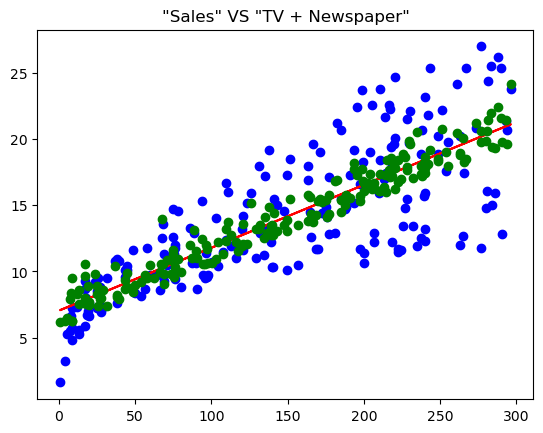

In [23]:
# Visualizar en un plot los resultados

plt.plot(dataframe['TV'], dataframe['Sales'], 'bo') # en puntos verdes las 'sales'
plt.plot(dataframe['TV'], dataframe['Sales - TV Predicción'], 'r') 
plt.plot(dataframe['TV'], dataframe['Sales - TV + Newspaper Predicción'], 'go') 
plt.title('"Sales" VS "TV + Newspaper"')

%matplotlib inline

In [24]:
# Calcular el error

ssd_2 = sum((dataframe['Sales'] - dataframe['Sales - TV + Newspaper Predicción']) ** 2)
rse_2 = np.sqrt(ssd_2 / (len(dataframe) - 2))

error_2 = rse_2 / y_promedio

In [25]:
print(f'EL error con TV y Newspaper es {round(error_2 * 100, 2)}% el cual es menor que el {round(error * 100, 2)}% de la regresión simple')

EL error con TV y Newspaper es 22% el cual es menor que el 23.24% de la regresión simple


In [26]:
# Añadimos el parametro de 'radio' para ver si el modelo mejora o no

regresion_triple = smf.ols(formula = 'Sales ~ TV + Newspaper + Radio', data = dataframe).fit()

In [31]:
# Calculamos los diferentes parametros

dataframe['Sales - TV + Newspaper + Radio'] = regresion_triple.predict(dataframe[['TV', 'Newspaper', 'Radio']])
ssd_3 = sum((dataframe['Sales'] - dataframe['Sales - TV + Newspaper + Radio']) ** 2)
rse_3 = np.sqrt(ssd_3 / (len(dataframe) - 2))

error_3 = rse_3 / y_promedio

In [32]:
print(f'EL error con TV y Newspaper y Radio es {round(error_3 * 100)}% el cual es menor que el {round(error_2 * 100, 2)}% de la regresión múltiple')

EL error con TV y Newspaper y Radio es 12% el cual es mayor que el 22.2% de la regresión múltiple


### Multicolinealidad

El fenomeno de colinealidad se da cuando la adición de un parametro más al modelo no solo no mejora la predicción si no que la empeora. Esto sucede cuando dos variables estan altamente correlacionadas. Para determinar si dos variables estar correlacionadas se utiliza el FACTOR  DE INFLACIÓN DE LA VARIANCIA (VIF

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

VIF = 1 / (1 - R2)

De este modo, el calculo del VIF se hace construyendo un modelo de regresión lineal de un parametro en función del resto para obtener un valor R2 del modelo. Una vez calculado el R2, si el valor VIF es suficientemente grande, se puede afirmar que hay suficiente evidencia para no incluir ese parametro en el modelo final.

In [34]:
# Ejemplo para ver si 'Radio' es un parametro a incluir

regresion_radio = smf.ols(formula = 'Radio ~ TV + Newspaper', data = dataframe).fit()
r2_radio = regresion_radio.rsquared

VIF_radio = 1 / (1 - r2_radio)
VIF_radio

1.1449519171055353

In [39]:
# Ejemplo para ver si cualquiera de las predicciones se correlaciona con la respuesta

regresion_respuesta = smf.ols(formula = 'Sales ~ Sales - TV Predicción', data = dataframe).fit()
r2_respuesta = regresion_respuesta.rsquared

VIF_respuesta = 1 / (1 - r2_respuesta)
VIF_respuesta

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19128\1807509124.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  VIF_respuesta = 1 / (1 - r2_respuesta)


inf